In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers , models


In [56]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


models.Sequential sets up a connected neural network with layers.

input_shape tells the model the shape of each input sample.

The weights and biases exist conceptually but don’t have meaningful values until you start training.

In [51]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28) , name = "layer1"),
    layers.Dense(128 , activation = 'relu' , name = "layer2"),
    layers.Dense(10 , activation = 'softmax' , name = "layer4")

])

# Weights = 784*128 + 128*10 = 101,632
# Biases = 0 + 128 + 10 = 138
# Total Parameters = 101770


In [52]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Flatten)                │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

You are telling the model how to learn during training.

You specify the loss function (sparse_categorical_crossentropy), which measures how far your model's predictions are from the actual labels.

You specify the optimizer (adam), which is the algorithm that adjusts the model’s weights and biases to minimize the loss.

You specify the metrics (accuracy), which tells the model what performance measure to keep track of during training.

In [54]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

TRAINING THE MODEL

In [55]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9243 - loss: 0.2649
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9659 - loss: 0.1165
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9758 - loss: 0.0799
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0597
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9858 - loss: 0.0467


In [57]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0778


In [58]:
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [59]:
prediction

array([[1.0359713e-08, 3.4300338e-09, 1.2126380e-05, ..., 9.9991632e-01,
        1.0981752e-06, 2.5688853e-06],
       [2.8907504e-10, 1.3100000e-05, 9.9998629e-01, ..., 5.3038391e-17,
        3.1312705e-08, 6.2949638e-15],
       [1.5160134e-07, 9.9912256e-01, 1.7078672e-04, ..., 2.2606282e-04,
        3.4015175e-04, 4.5903339e-06],
       ...,
       [6.7366148e-13, 1.5615438e-11, 2.3601397e-11, ..., 8.7881858e-08,
        4.4524163e-06, 5.1815105e-06],
       [3.5271135e-09, 1.2698244e-10, 4.3320461e-10, ..., 1.8084645e-10,
        8.0261241e-05, 4.5237986e-10],
       [1.7948025e-08, 3.6997665e-13, 1.1285073e-09, ..., 3.8633007e-11,
        1.9934727e-10, 1.6494003e-10]], shape=(10000, 10), dtype=float32)

The model outputs probabilities showing how confident it is that the input belongs to each class.

In [60]:
prediction[0]

array([1.0359713e-08, 3.4300338e-09, 1.2126380e-05, 6.7829824e-05,
       1.4041409e-09, 8.0756394e-08, 1.1298938e-12, 9.9991632e-01,
       1.0981752e-06, 2.5688853e-06], dtype=float32)

In [ ]:
prediction[9999]  ## It is showing that 6 has the higher prediction so the x_test[9999] must be 6 according to the model

array([1.7948025e-08, 3.6997665e-13, 1.1285073e-09, 1.4279396e-08,
       3.0850881e-08, 8.1180178e-07, 9.9999917e-01, 3.8633007e-11,
       1.9934727e-10, 1.6494003e-10], dtype=float32)

ANS IS 6

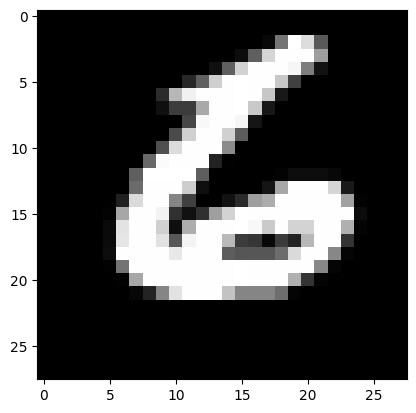

In [66]:
plt.imshow(x_test[9999] ,cmap = "gray")